In [117]:
import torch
import matplotlib.pyplot as plt
from torch import nn

In [118]:
#creating a straight line dataset using linear regression formula
weight = 0.3
bias = 0.9

X = torch.arange(0,1,0.01).unsqueeze(dim=1)
y = weight * X + bias
X,X.numel(),y

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900],
         [0.1000],
         [0.1100],
         [0.1200],
         [0.1300],
         [0.1400],
         [0.1500],
         [0.1600],
         [0.1700],
         [0.1800],
         [0.1900],
         [0.2000],
         [0.2100],
         [0.2200],
         [0.2300],
         [0.2400],
         [0.2500],
         [0.2600],
         [0.2700],
         [0.2800],
         [0.2900],
         [0.3000],
         [0.3100],
         [0.3200],
         [0.3300],
         [0.3400],
         [0.3500],
         [0.3600],
         [0.3700],
         [0.3800],
         [0.3900],
         [0.4000],
         [0.4100],
         [0.4200],
         [0.4300],
         [0.4400],
         [0.4500],
         [0.4600],
         [0.4700],
         [0.4800],
         [0.4900],
         [0.5000],
         [0.5100],
         [0.

In [119]:
# splitting training and testing set
train_split = int(0.8*len(X)) #80% of total datapoints are reserved for training, rest for testing.
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]
X_train.numel(),X_test.numel(),y_train.numel(),y_test.numel()

(80, 20, 80, 20)

In [120]:
# function for plotting data predictions
def plot_predictions(train_data=X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
    plt.figure(figsize=(5,5))
    plt.scatter(train_data,train_labels,c='b',s=4,label="Training data")
    plt.scatter(test_data,test_labels,c='y',s=4,label="Testing data")

    if predictions is not None:
        plt.scatter(test_data,predictions,c='r',s=4,label="predictions")

    plt.legend(prop={"size":14})

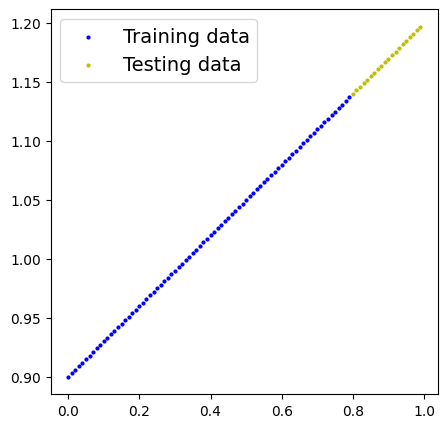

In [121]:
plot_predictions();

In [122]:
#BUILDING THE MODEL
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) #nn.Parameter is trying to register our parameters in the parameters() method of the module so that optimizers can update the paramters from the parameters().
        self.bias = nn.Parameter(torch.randn(1,requires_grad=True,dtype=torch.float)) #nn.Parameter is trying to register our parameters in the parameters() method of the module so that optimizers can update the paramters from the parameters().

    def forward(self,X:torch.tensor)-> torch.Tensor:
        return self.weights * X + self.bias
        

In [123]:
torch.manual_seed(42)
model = LinearRegressionModel()

In [124]:
model.state_dict(),list(model.parameters())

(OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))]),
 [Parameter containing:
  tensor([0.3367], requires_grad=True),
  Parameter containing:
  tensor([0.1288], requires_grad=True)])

In [125]:
with torch.inference_mode():
    y_preds = model(X_test)
y_preds

tensor([[0.3982],
        [0.4015],
        [0.4049],
        [0.4083],
        [0.4116],
        [0.4150],
        [0.4184],
        [0.4217],
        [0.4251],
        [0.4285],
        [0.4318],
        [0.4352],
        [0.4386],
        [0.4419],
        [0.4453],
        [0.4487],
        [0.4520],
        [0.4554],
        [0.4588],
        [0.4621]])

In [126]:
#setting up loss function and optimizers
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(),lr=0.01)

In [127]:
#creating a training loop
epochs = 1000

epoch_count=[]
loss_values=[]
test_loss_values=[]

for epoch in range(epochs):

    #setting train mode
    model.train()

    #forward pass
    y_pred = model(X_train)

    #finding loss
    loss = loss_fn(y_pred,y_train)
    print(f"Loss:{loss}")

    #optimizer zero grad
    optimizer.zero_grad()

    #backpropagation
    loss.backward()

    #optimizer step
    optimizer.step()

    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred,y_test)

    if epoch % 20 == 0 :
        model.eval()
        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        print(f'epochs:{epoch},loss:{loss},test loss:{test_loss}')
        print(model.state_dict())


Loss:0.7566978335380554
epochs:0,loss:0.7566978335380554,test loss:0.7248174548149109
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Loss:0.745137631893158
Loss:0.7335773706436157
Loss:0.7220171093940735
Loss:0.7104568481445312
Loss:0.698896586894989
Loss:0.6873363256454468
Loss:0.6757761240005493
Loss:0.6642158627510071
Loss:0.6526556015014648
Loss:0.6410952806472778
Loss:0.6295350790023804
Loss:0.6179748773574829
Loss:0.6064146161079407
Loss:0.5948542952537537
Loss:0.5832940936088562
Loss:0.571733832359314
Loss:0.5601736307144165
Loss:0.5486133694648743
Loss:0.537053108215332
Loss:0.5254928469657898
epochs:20,loss:0.5254928469657898,test loss:0.4541124403476715
OrderedDict({'weights': tensor([0.4196]), 'bias': tensor([0.3388])})
Loss:0.5139325857162476
Loss:0.5023724436759949
Loss:0.49081215262413025
Loss:0.4792519211769104
Loss:0.46769165992736816
Loss:0.4561313986778259
Loss:0.44457119703292847
Loss:0.4330109655857086
Loss:0.4214507043361664
Loss:0.40989047288

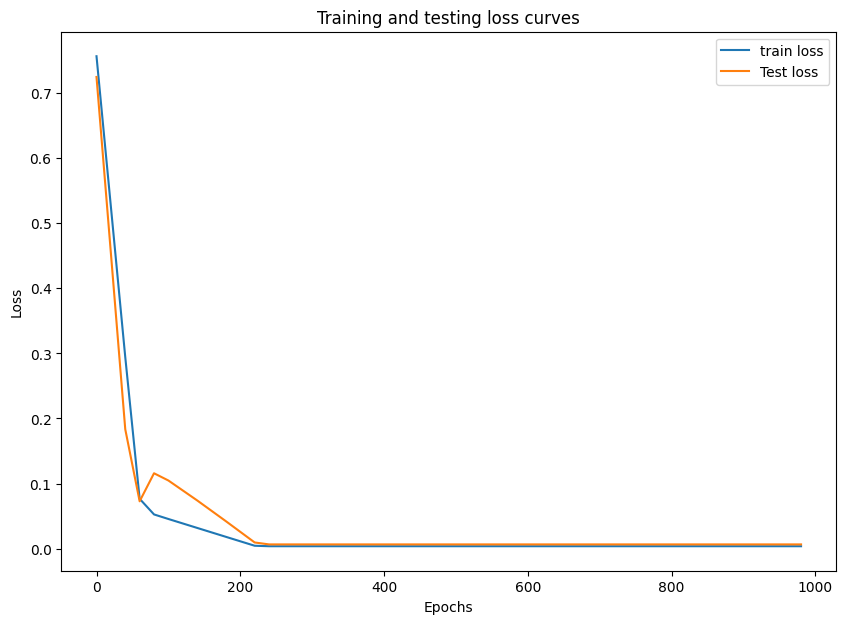

In [128]:
# visualizing the train and test loss 
plt.figure(figsize=(10,7))
plt.plot(epoch_count,(torch.tensor(loss_values).numpy()),label="train loss")
plt.plot(epoch_count,test_loss_values,label="Test loss")
plt.title("Training and testing loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

In [129]:
model.state_dict(),weight,bias

(OrderedDict([('weights', tensor([0.3067])), ('bias', tensor([0.9011]))]),
 0.3,
 0.9)

In [130]:
with torch.inference_mode():
    y_preds_new = model(X_test)

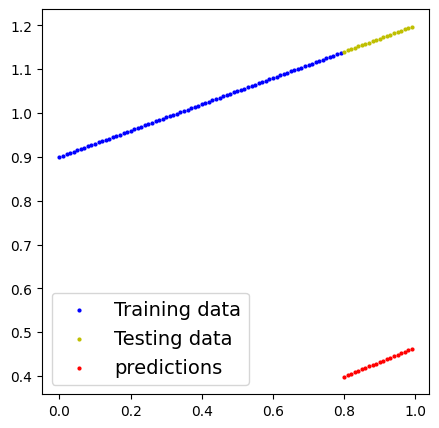

In [131]:
plot_predictions(predictions=y_preds);

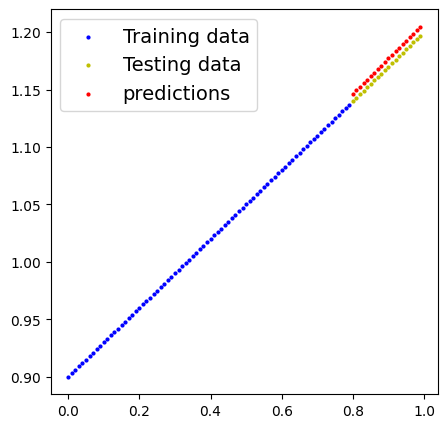

In [132]:
plot_predictions(predictions=y_preds_new);

In [133]:
# saving the model state dict (most convenient method for saving rather than saving whole model)
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)

MODEL_NAME = "01_exercise_model.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model.state_dict(),f=MODEL_SAVE_PATH)

Saving model to models/01_exercise_model.pth


In [134]:
# Loading the model 

#lets instantize the model
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH,weights_only=True))

print(f"loaded model:{loaded_model}")

loaded model:LinearRegressionModel()


In [137]:
loaded_model.eval()
with torch.inference_mode():
    loaded_model_preds = loaded_model(X_test)
y_preds_new == loaded_model_preds
# y_preds_new,loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [ ]:
# exercise completed.